<a href="https://colab.research.google.com/github/roszcz/matplotlib-cinematic-universe/blob/master/MCU_Double_Pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Double Pendulum Animation with Matplotlib

Code demonstration from blogpost about scientific animation in matplotlib: https://labs.filestack.com/posts/pyplot-animations/

#### Prepare environment

In [ ]:
!git clone https://github.com/roszcz/matplotlib-cinematic-universe

import sys
import numpy as np
from IPython.display import Image
from matplotlib import pyplot as plt
# In Colab it's transparent by default
plt.rcParams['savefig.facecolor'] = 'white'

sys.path.append('./matplotlib-cinematic-universe')
from mcu import ffmpeg

### Double pendulum simulation

In [2]:
import numpy as np
from mcu.pendulum.structures import Pendulum, PendulumSwing, PendulumState
from mcu.pendulum.solver import DoublePendulumHamiltonianSolver

pendulum = Pendulum(L2=0.666)
initial_pendulum_state = PendulumState(
    hardware=pendulum,
    t1=np.pi/2,
    t2=3 * np.pi/2
)
solver = DoublePendulumHamiltonianSolver(initial_pendulum_state)

duration_s = 10
dt = 1e-3
pendulum_simulation = solver.solve(duration_s, dt)

100%|██████████| 300/300 [01:37<00:00,  3.07it/s]


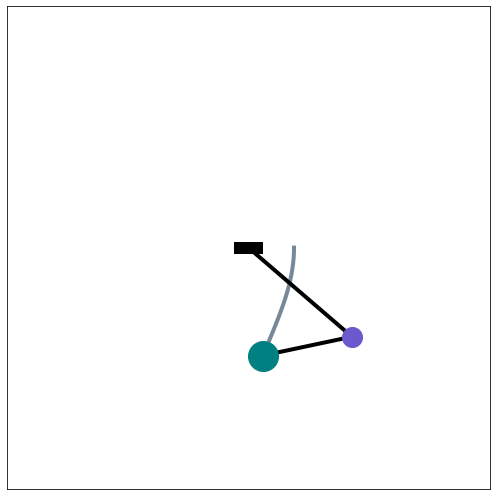

In [3]:
from mcu.pendulum.scenes import SwingingPendulum

s = SwingingPendulum(pendulum_simulation)
content_dir = s.render()

# Draw one frame as a preview
s.draw_all(400)

gif saved to: tmp/swinging_pendulum.gif


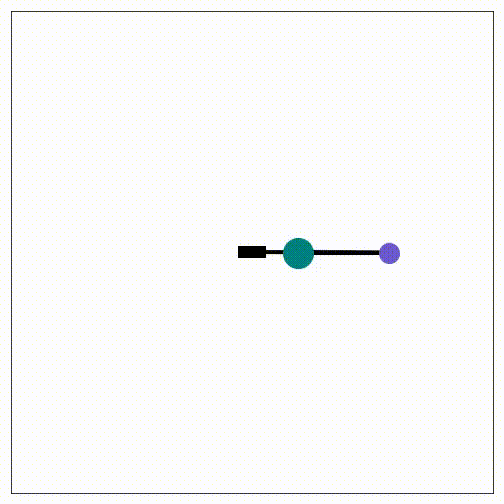

In [4]:
gif_path = 'tmp/swinging_pendulum.gif'
ffmpeg.image_directory_to_gif(content_dir, gif_path)

Image(open(gif_path,'rb').read())

### Speeding up complex animations

There are couple of things going on in this figure and it takes a while to render. Outside of Colab you can speed it up significantly by using multiprocessing to generate separate frames in separate threads. In Colab this animation takes ~10 minutes. On a 8 core PC you can make it in three.

100%|██████████| 300/300 [09:57<00:00,  1.99s/it]


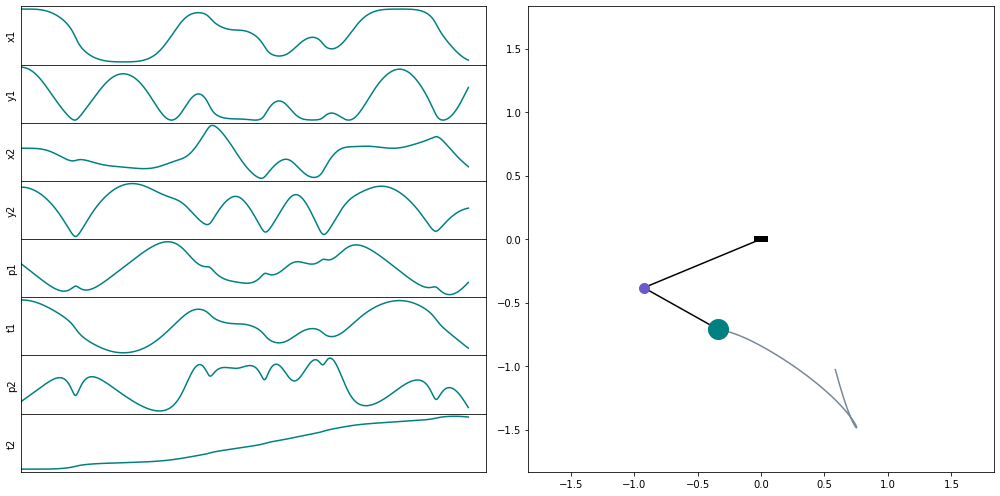

In [5]:
from mcu.pendulum.scenes import SwingWithStats

s = SwingWithStats(pendulum_simulation)
content_dir = s.render()

# Draw one frame as a preview
s.draw_all(5000)

In [ ]:
gif_path = 'tmp/swinging_pendulum_with_stats.gif'
ffmpeg.image_directory_to_gif(content_dir, gif_path)

Image(open(gif_path,'rb').read())

100%|██████████| 300/300 [02:41<00:00,  1.85it/s]


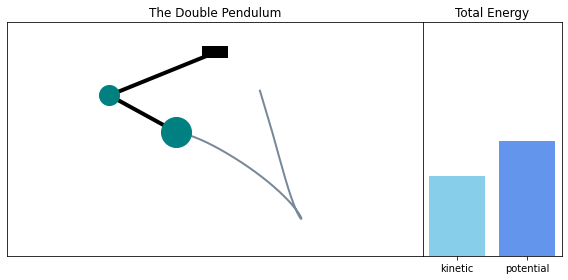

In [7]:
from mcu.pendulum.scenes import SwingingWithEnergyBars

s = SwingingWithEnergyBars(pendulum_simulation)
content_dir = s.render()

# Draw one frame as a preview
s.draw_all(5000)

gif saved to: tmp/swinging_pendulum_with_energy.gif


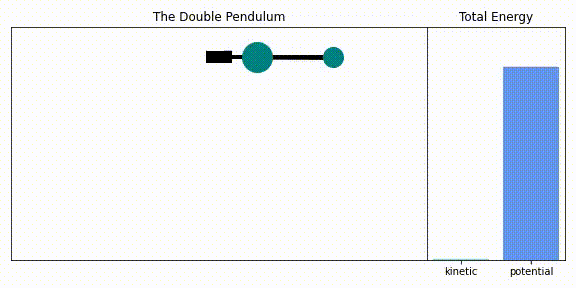

In [8]:
gif_path = 'tmp/swinging_pendulum_with_energy.gif'
ffmpeg.image_directory_to_gif(content_dir, gif_path)

Image(open(gif_path,'rb').read())